# Python 的 50+ 練習

> 監督式學習

[數據交點](https://www.datainpoint.com/) | 郭耀仁 <yaojenkuo@datainpoint.com>

## 這個章節會登場的模組

`scikit-learn` 模組。

## （複習）現代資料科學：以程式設計做資料科學的應用

![](r-for-data-science.png)

來源：[R for Data Science](https://r4ds.had.co.nz)

## （複習）什麼是資料科學的應用場景

- Import 資料的載入。
- Tidy 資料清理。
- Transform 資料外型與類別的轉換。
- Visualise 探索性分析。
- **Model 分析與預測模型**。
- Communicate 溝通分享。

## （複習）根據說明文件的範例載入

多數時候我們使用 Scikit-Learn 中的特定類別或函數，因此以 `from sklearn import FUNCTION/CLASS` 載入特定類別或函數，而非 `import sklearn`

來源：<https://scikit-learn.org/stable/getting_started.html>

## 關於監督式學習

## 什麼是模型

- 模型（Model）是一個類似於「函數」的概念，由參數與運算組成。
- 模型的參數以及運算可以透過不同的方式生成，生成方式包含規則敘述與歷史資料訓練。
    - 透過規則敘述生成參數以及運算，稱為基於規則的模型（Rule-based model）或稱專家模型。
    - 透過歷史資料訓練生成參數以及運算，稱為基於演算法的模型（Algorithm-based model）或稱基於機器學習的模型。
- 不同模型除了相互比較，也可以與基準（Baseline）模型比較，常用來作為基準模型的像是基於隨機的黑猩猩模型或稱虛假模型（Dummy model），像是以投擲硬幣、骰子或者射飛鏢來決定模型的輸出。

## 可以採用哪種模型解決問題

- 採用基於規則的模型：
    - 問題能用人類語言描述邏輯、撰寫規則。
    - 答案不能容忍誤差。
- 採用基於機器學習的模型：
    - 問題非領域專家不容易描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。

## 可以採用哪種模型解決問題（續）

- 採用基於規則的模型：給定整數判斷它是否為奇數、偶數或者質數。
- 採用基於機器學習的模型：給定一位 NBA 球員的生涯場均助攻與場均籃板來猜他是中鋒、前鋒、後衛或者能夠打多個位置的搖擺人、中前鋒、雙能衛等鋒衛位置。

## （複習）機器學習的三個要素、一個但書

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P if its performance at tasks in T, as measured by P, improves with experience E.

來源：[Machine Learning, Tom Mitchell, McGraw Hill, 1997](http://www.cs.cmu.edu/~tom/mlbook.html)

## （複習）以機器學習的電腦程式解決問題的方式示意圖

![Imgur](https://i.imgur.com/YunyLd7.png)

來源：<https://www.coursera.org/learn/introduction-tensorflow>

## （複習）給定答案 $y$ 以及資料 $X$，機器學習的電腦程式在最小化損失函數 $J$ 的前提下生成規則 $w$，進而獲得預測 $\hat{y}$

\begin{equation}
\text{choose} \; w \in \{w^1, w^2, ..., w^n\} \\
\text{where} \; w \; \text{minimizes} \; J(w) \\
\text{subject to} \; \hat{y} = h(X; w) = Xw \\
\text{where} \; J(w) \; \text{measures the loss between} \; y \; \text{and} \; \hat{y} \\
\end{equation}

## 基於機器學習的模型可再分為

- 監督式學習：訓練資料中具備已實現的數值或標籤。
    - 迴歸：數值預測的任務。
    - 分類：類別預測的任務。
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤。

## 數值預測的任務

## 數值預測的任務：迴歸模型

- 「數值預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於連續型數值變數。
- 更常被稱為「迴歸模型」。

## （複習）預測數值時最常見的損失函數 $J$

最小化訓練資料的均方誤差（Mean squared error）。

\begin{align}
\operatorname*{arg\,min}_w \;  J(w) =  \frac{1}{m} \sum_i^m (y_i^{(train)} - \hat{y_i}^{(train)})^2
\end{align}

## 預測 NBA 球員的體重

- 資料（Experience）：一定數量的球員資料。
- 任務（Task）：利用模型預測球員的體重。
- 評估（Performance）：模型預測的體重與球員實際體重的誤差大小。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤差應該要減少。

In [1]:
import pandas as pd

csv_path = "/home/jovyan/data/nba/player_stats.csv"
player_stats = pd.read_csv(csv_path)
y = player_stats["weightKilograms"].values
y.dtype # y is a numeric variable

dtype('float64')

## 該如何預測 NBA 球員的體重

1. 虛假模型。
2. 基於規則的專家模型。
3. 基於機器學習的模型。

## 虛假模型

在 NBA 球員體重全距之間取隨機整數。

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_max, y_min = y.max(), y.min()
y_hat = np.random.randint(low=y_min, high=y_max, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [3]:
from sklearn.metrics import mean_squared_error

mse_dummy = mean_squared_error(y_valid, y_hat)
mse_dummy

629.1396385542168

## 基於規則的專家模型

根據 NBA 球員的鋒衛位置取其平均體重。

In [4]:
mean_weight_by_pos = player_stats.groupby("pos")["weightKilograms"].mean()
mean_weight = player_stats["pos"].map(mean_weight_by_pos).values
mean_weight_train, y_hat = train_test_split(mean_weight, test_size=0.33, random_state=42)

## 評估基於規則的專家模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [5]:
mse_expert = mean_squared_error(y_valid, y_hat)
mse_expert

50.668004006804765

## 基於機器學習的模型

將 `heightMeters` 當作特徵矩陣 $x_i$ 作為體重的預測依據。

\begin{equation}
\operatorname*{arg\,min}_w \; \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - \hat{y_i}^{(train)})^2} = \frac{1}{m}\sum_{i}^{m}{(y^{(train)}_i - x_i^{(train)} w)^2}
\end{equation}

## （複習）使用 Scikit-Learn 預測器的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 切割訓練與驗證資料。
3. 建立預測器類別的物件。
4. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
5. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
6. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [6]:
from sklearn.linear_model import LinearRegression

X = player_stats["heightMeters"].values.reshape(-1, 1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_hat = linear_regression.predict(X_valid)

## 評估基於機器學習的模型：驗證資料與預測資料的均方誤差

\begin{equation}
\text{MSE}_{valid} = \frac{1}{m}\sum_{i}^{m}{(y^{(valid)}_i - \hat{y_i}^{(valid)})^2}
\end{equation}

In [7]:
mse_ml = mean_squared_error(y_valid, y_hat)
mse_ml

62.807098266825335

## 該如何預測 NBA 球員的體重：考量哪個模型驗證資料與預測資料的均方誤差最小

1. 基於規則的專家模型。
2. 基於機器學習的模型。
3. 虛假模型。

In [8]:
print(mse_expert)
print(mse_ml)
print(mse_dummy)

50.668004006804765
62.807098266825335
629.1396385542168


## 類別預測的任務

## 類別預測的任務：分類器

- 「類別預測」是「監督式學習」的其中一種應用類型。
- 預測的目標向量 $y$ 屬於離散型的類別變數。
- 更常被稱為「分類器」。

## （複習）預測類別時最常見的損失函數 $J$

最小化訓練資料的誤分類數。

\begin{align}
\operatorname*{arg\,min}_w \; J(w) = \sum_j n(E^{(train)}_j) \text{ where } E^{(train)}_j \; \text{represents the occurrence of } y^{(train)}_j \neq \hat{y^{(train)}_j}
\end{align}

## 預測 NBA 球員的鋒衛位置

- 資料（Experience）：一定數量的球員資料。
- 任務（Task）：利用模型預測球員的鋒衛位置。
- 評估（Performance）：模型預測的鋒衛位置與球員實際鋒衛位置的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

In [9]:
# players_stats 資料中的 pos
player_stats["pos"].values.dtype

dtype('O')

## `player_stats` 資料中的 `pos` 有 7 個不同的類別

In [10]:
print(player_stats["pos"].unique())
print(player_stats["pos"].nunique())

['F' 'C' 'C-F' 'G' 'F-G' 'G-F' 'F-C']
7


## 先將多元分類問題簡化為二元分類問題

- 鋒衛位置分作後衛（G）與前鋒（F）。
- 分別對應整數 1 與整數 0。

In [11]:
pos_binary = player_stats["pos"].map(lambda x: 0 if x[0] == "G" else 1)
y = pos_binary.values
np.unique(y)

array([0, 1])

## 該如何預測 NBA 球員的鋒衛位置

1. 虛假模型。
2. 基於規則的專家模型。
3. 基於機器學習的模型。

## 虛假模型

在 0 與 1 之間取隨機整數。

In [12]:
y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_hat = np.random.randint(0, 2, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [13]:
errors_dummy = np.sum(y_valid != y_hat)
print(errors_dummy)
print(y_valid.size)
print(errors_dummy / y_valid.size)

90
166
0.5421686746987951


## 基於規則的專家模型

根據 NBA 球員的場均助攻數決定，場均助攻超過平均值則是 1，小於等於平均值則是 0。

In [14]:
mean_apg = player_stats["apg"].mean()
mean_apg_train_y_hat = player_stats["apg"].map(lambda x: 0 if x > mean_apg else 1).values
mean_apg_train, y_hat = train_test_split(mean_apg_train_y_hat, test_size=0.33, random_state=42)

## 評估專家模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [15]:
errors_expert = np.sum(y_valid != y_hat)
print(errors_expert)
print(y_valid.size)
print(errors_expert / y_valid.size)

58
166
0.3493975903614458


## 基於機器學習的模型

將 `apg` 與 `rpg` 當作特徵矩陣 $X$ 作為鋒衛位置的預測依據。

## （複習）使用 Scikit-Learn 預測器的標準步驟

1. 準備欲訓練預測的特徵矩陣 $X$  與目標陣列 $y$
2. 切割訓練與驗證資料。
3. 建立預測器類別的物件。
4. 將訓練特徵矩陣 $X^{train}$ 與目標陣列 $y^{train}$ 輸入 `predictor.fit()`
5. 將驗證特徵矩陣 $X^{valid}$ 輸入 `predictor.predict()` 獲得 $\hat{y}^{valid}$
6. 比對 $\hat{y}^{valid}$ 與 $y^{valid}$ 之間的差異

In [16]:
from sklearn.linear_model import LogisticRegression

X = player_stats[["apg", "rpg"]].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_hat = logistic_regression.predict(X_valid)

## 評估基於機器學習的模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [17]:
errors_ml = np.sum(y_valid != y_hat)
print(errors_ml)
print(y_valid.size)
print(errors_ml / y_valid.size)

28
166
0.1686746987951807


## 該如何預測 NBA 球員的鋒衛位置：考量哪個模型驗證資料與預測資料的誤分類數最少

1. 機器學習模型。
2. 專家模型。
3. 虛假模型。

In [18]:
print(y_valid.size)
print(errors_ml)
print(errors_expert)
print(errors_dummy)

166
28
58
90


## 無法描述規則的任務

## 前面的數值、類別預測任務我們都有建立基於規則的專家模型

- 有一些問題無法建立基於規則的專家模型，像是影像分類、語音識別或機器翻譯等，都屬於無法描述規則的任務。
- 對人類來說影像分類、語音識別或語言翻譯是很輕易能辦到的，但要寫出其中的規則、邏輯是極其困難的。

## 該如何處理無法描述規則的任務

- 以機器學習領域的一個分支**深度學習**來處理。
- 深度學習是一種不需要使用者**直接**決定特徵的最適化方法，而是由深度學習的結構**間接**決定。

## 辨識手寫數字圖片的數字

- 資料（Experience）：一定數量的手寫數字圖片。
- 任務（Task）：利用模型辨識手寫數字圖片的數字。
- 評估（Performance）：模型辨識的數字與實際數字的誤分類數。
- 但書（Condition）：隨著資料觀測值筆數增加，預測誤分類數應該要減少。

## 手寫數字圖片資料中的 `label` 有 10 個不同的類別（0-9）

In [19]:
csv_url = "https://kaggle-getting-started.s3.ap-northeast-1.amazonaws.com/mnist/train.csv"
train = pd.read_csv(csv_url)
train["label"].values.dtype

dtype('int64')

In [20]:
print(train["label"].unique())
print(train["label"].nunique())

[1 0 4 7 3 5 8 9 2 6]
10


## 看看前 10 列的手寫數字圖片

使用 `AxesSubplot.imshow()` 顯示圖片。

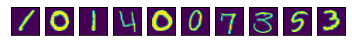

In [21]:
import matplotlib.pyplot as plt

m = 10
fig, axes = plt.subplots(1, m)
for index, series in train.head(m).iterrows():
    Xi = (series["pixel0":"pixel783"]).values.reshape(28, 28)
    axes[index].imshow(Xi)
    axes[index].set_xticks([]) # turn off xticks
    axes[index].set_yticks([]) # turn off yticks
plt.show()

## 辨識手寫數字圖片的數字

1. 虛假模型。
2. ~~基於規則的專家模型。~~
3. 基於深度學習的模型。

## 虛假模型

在 0 與 9 之間取隨機整數。

In [22]:
y = train["label"].values
y_train, y_valid = train_test_split(y, test_size=0.33, random_state=42)
y_hat = np.random.randint(0, 10, size=y_valid.size)

## 評估虛假模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [23]:
errors_dummy = np.sum(y_valid != y_hat)
print(errors_dummy)
print(y_valid.size)
print(errors_dummy / y_valid.size)

12438
13860
0.8974025974025974


## 基於深度學習的模型

- 將 `pixel0` 到 `pixel783` 當作特徵矩陣 $X$ 作為手寫數字圖片的預測依據。
- 我們對機器學習和深度學習都是點到為止，不暸解 `MLPClassifier` 參數是正常的。

In [24]:
from sklearn.neural_network import MLPClassifier

X = train.loc[:, "pixel0":"pixel783"].values.astype(float)
X /= 255.0 # standardize X
y = train["label"].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)
mlp_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=20, alpha=1e-4, 
                               solver="sgd", verbose=10, random_state=1,
                               learning_rate_init=0.1)
mlp_classifier.fit(X_train, y_train)
y_hat = mlp_classifier.predict(X_valid)

Iteration 1, loss = 0.43180376
Iteration 2, loss = 0.20848267
Iteration 3, loss = 0.15877069
Iteration 4, loss = 0.12626574
Iteration 5, loss = 0.10516230
Iteration 6, loss = 0.08823135
Iteration 7, loss = 0.07438078
Iteration 8, loss = 0.06704161
Iteration 9, loss = 0.05740887
Iteration 10, loss = 0.04949325
Iteration 11, loss = 0.04269057
Iteration 12, loss = 0.03812857
Iteration 13, loss = 0.03424393
Iteration 14, loss = 0.02846397
Iteration 15, loss = 0.02558921
Iteration 16, loss = 0.02179269
Iteration 17, loss = 0.01983708
Iteration 18, loss = 0.01722650
Iteration 19, loss = 0.01611390
Iteration 20, loss = 0.01306801


/Users/kuoyaojen/opt/miniconda3/envs/pythonfiftyplus/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


## 評估深度學習的模型：驗證資料與預測資料的誤分類數

\begin{align}
\sum_j n(E^{(valid)}_j) \text{ where } E^{(valid)}_j \; \text{represents the occurrence of } y^{(valid)}_j \neq \hat{y^{(valid)}_j}
\end{align}

In [25]:
errors_dl = np.sum(y_valid != y_hat)
print(errors_dl)
print(y_valid.size)
print(errors_dl / y_valid.size)

469
13860
0.03383838383838384


## 該如何辨識手寫數字圖片的數字：考量哪個模型驗證資料與預測資料的誤分類數最少

1. 深度學習模型。
2. 虛假模型。

In [26]:
print(y_valid.size)
print(errors_dl)
print(errors_dummy)

13860
469
12438


## 重點統整

- 模型（Model）是一個類似於「函數」的概念，由參數與運算組成。
- 模型的參數以及運算可以透過不同的方式生成，生成方式包含規則敘述與歷史資料訓練。
    - 透過規則敘述生成參數以及運算，稱為基於規則的模型（Rule-based model）或稱專家模型。
    - 透過歷史資料訓練生成參數以及運算，稱為基於演算法的模型（Algorithm-based model）或稱基於機器學習的模型。

## 重點統整（續）

- 採用基於規則的模型：
    - 問題能用人類語言描述邏輯、撰寫規則。
    - 答案不能容忍誤差。
- 採用基於機器學習的模型：
    - 問題非領域專家不容易描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。
- 採用基於深度學習的模型：
    - 問題完全不能用人類語言描述邏輯、撰寫規則。
    - 答案能夠容忍誤差。

## 重點統整（續）

- 監督式學習：訓練資料中具備已實現的數值或標籤。
    - 迴歸：數值預測的任務。
    - 分類：類別預測的任務。
- 非監督式學習：訓練資料中「不」具備已實現的數值或標籤。
- 如何選擇模型：考量哪個模型驗證資料與預測資料的誤差最少。
    - 數值預測任務：均方誤差。
    - 類別預測任務：誤分類數。